## Titanic datset analysis and survival prediction

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib notebook

In [69]:
df = pd.read_csv('D:\\Data science\\datasets\\titanic\\train.csv')
df.set_index('PassengerId', inplace=True)

In [70]:
df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


<IPython.core.display.Javascript object>


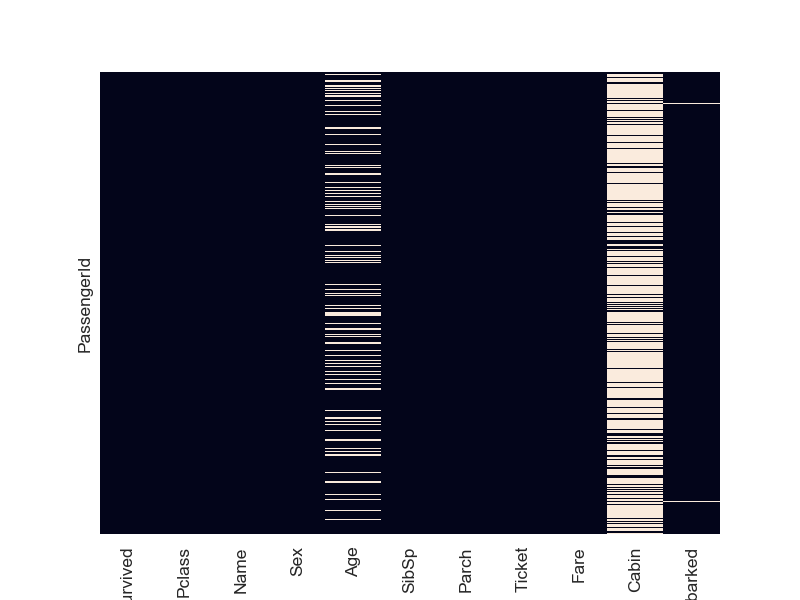

In [72]:
fig, axes = plt.subplots(1,1)

The white spaces in the above heatmap indicate missing values

In [73]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, ax=axes)

### Replacing nan values

#### Age

In [75]:
df.Age.fillna(df.Age.mean(), inplace=True)

<IPython.core.display.Javascript object>


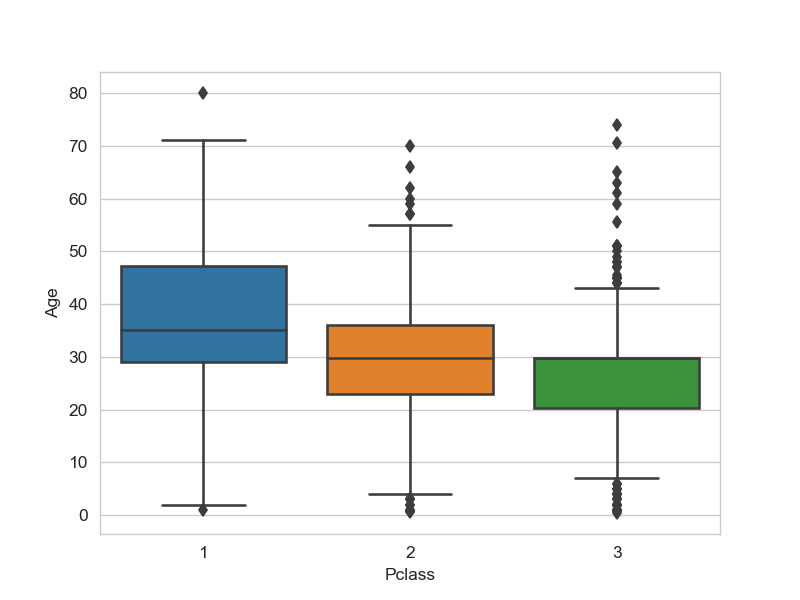

In [76]:
fig, axes = plt.subplots(1,1)

From the above graph we observe that the mean ages of people in different classes are different.

In [77]:
sns.boxplot(x='Pclass', y='Age', data=df)

In [78]:
#Replacing nan values with means of respective classes
# pclass 1 --> 37
# pclass 2 --> 29
# pclass 3 --> 24

def fill_na_age(cols):
    age=cols[0]
    pclass=cols[1]
    
    if pd.isnull(age):
        
        if pclass==1:
            return 37
        elif pclass==2:
            return 29
        elif pclass==3:
            return 24
    else:
        return age

In [79]:
df['Age'] = df[['Age', 'Pclass']].apply(fill_na_age, axis=1)

<IPython.core.display.Javascript object>


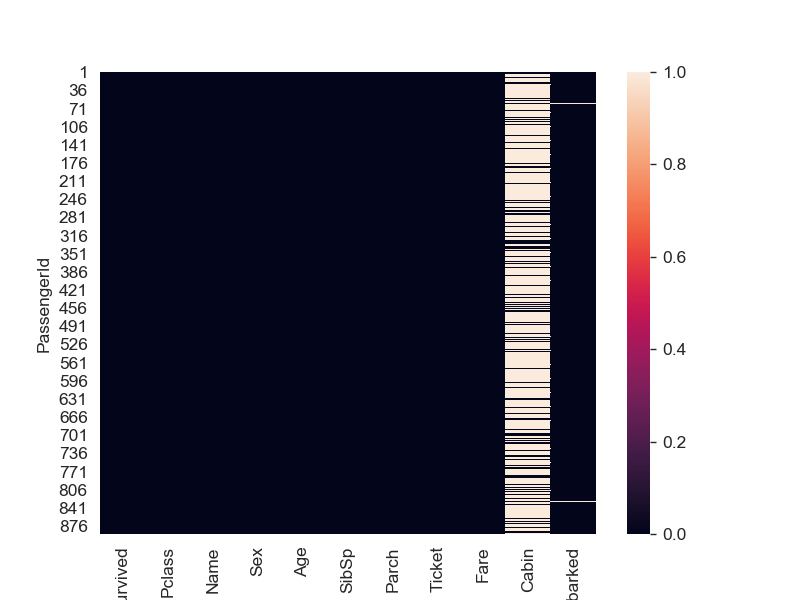

In [80]:
fig, axses= plt.subplots(1,1) 

The white spaces from the age have disappeared since all the nan values for age have been replaced.

In [81]:
sns.heatmap(df.isnull())

#### Fare

In [82]:
(df['Fare'] == 0).sum()

15

- There are 15 entries with 0 as fare. So we need to replace them since the fare cannot be zero.
- We replace them with mean fare.

In [83]:
df['Fare'].replace({0 : df.Fare.mean()}, inplace=True)

In [84]:
(df['Fare'] == 0).sum()
#Now there are no entries with zero fare

0

### Univariate Analysis

<IPython.core.display.Javascript object>


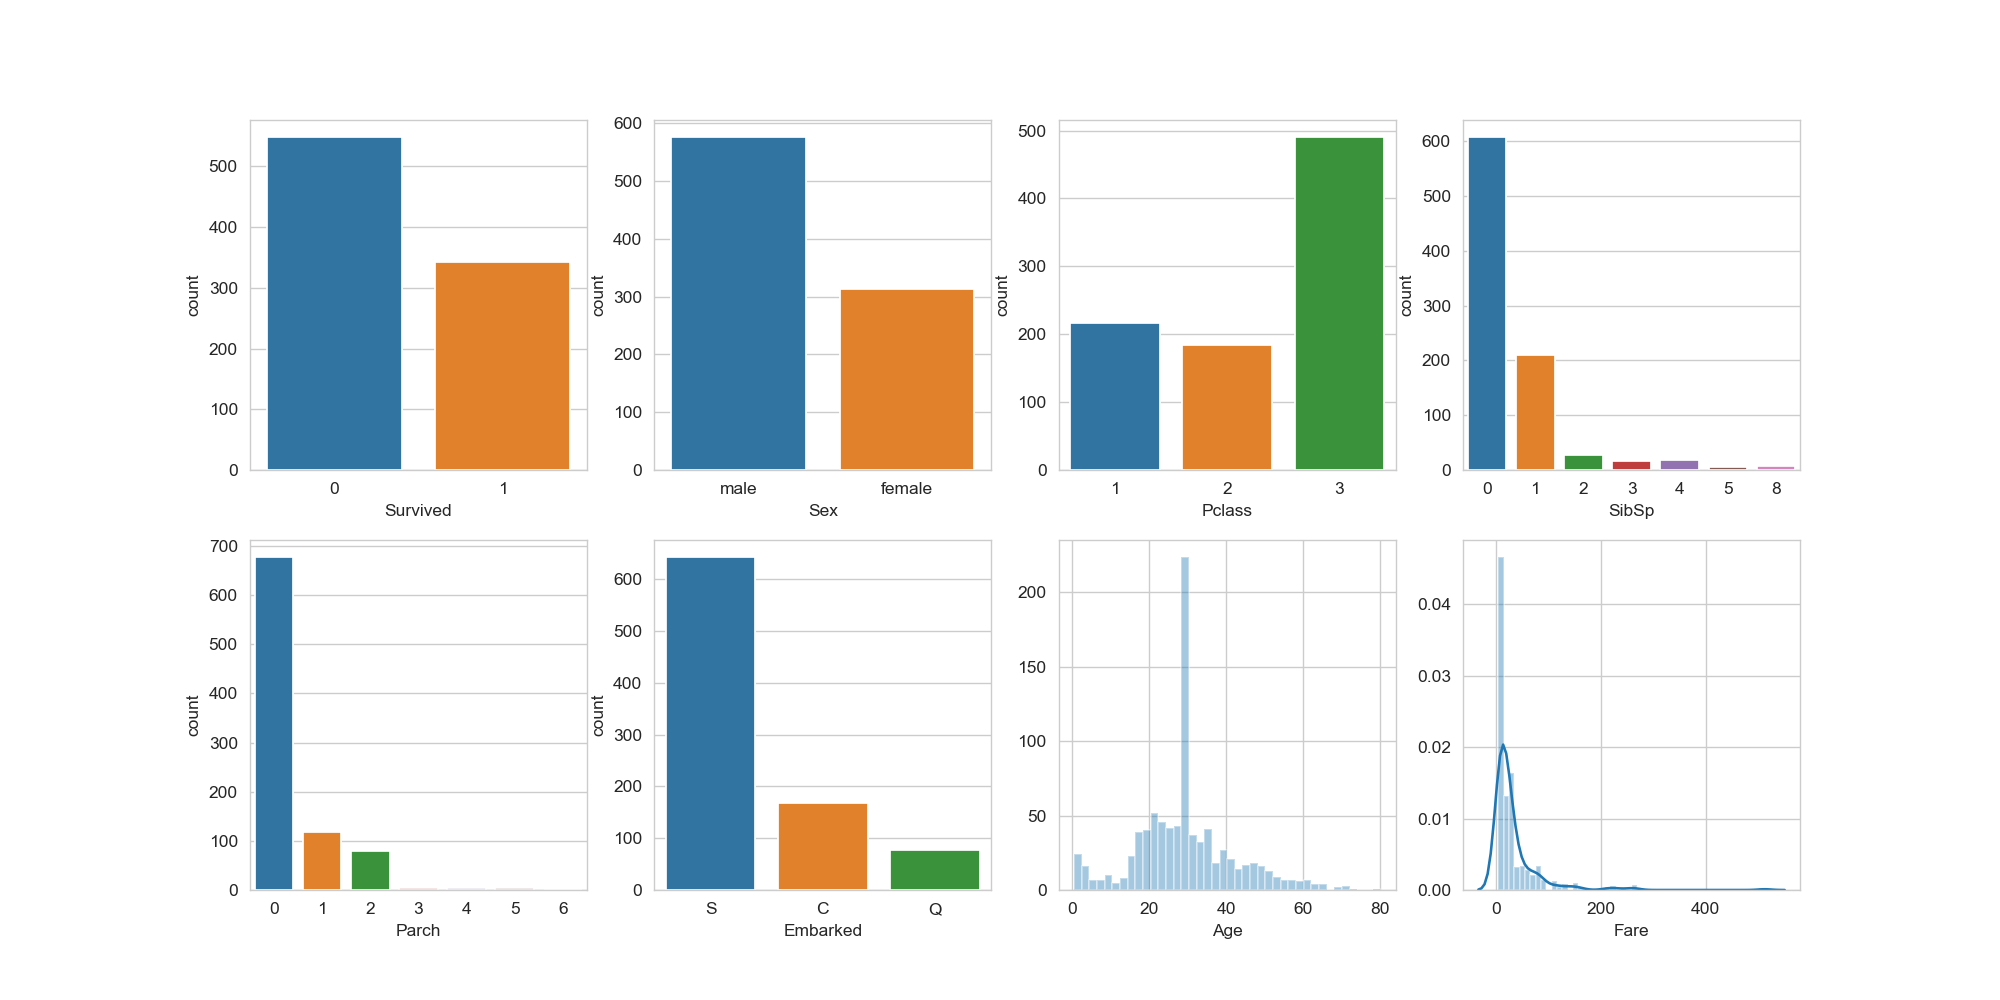

In [85]:
fig, axes = plt.subplots(2, 4, figsize=(16,8), squeeze=False)

In [86]:
sns.set_style('whitegrid')
sns.countplot('Survived', data=df, ax=axes[0,0])
sns.countplot('Sex', data=df, ax=axes[0,1])
sns.countplot('Pclass', data=df, ax=axes[0,2])
sns.countplot('SibSp', data=df, ax=axes[0,3])
sns.countplot('Parch', data=df, ax=axes[1,0])
sns.countplot('Embarked', data=df, ax=axes[1,1])
sns.distplot(df['Age'].dropna(), bins=40, kde=False, ax=axes[1,2])
sns.distplot(df['Fare'], ax=axes[1,3])

### Bivariate Analysis w.r.t target variable(Survived)

<IPython.core.display.Javascript object>


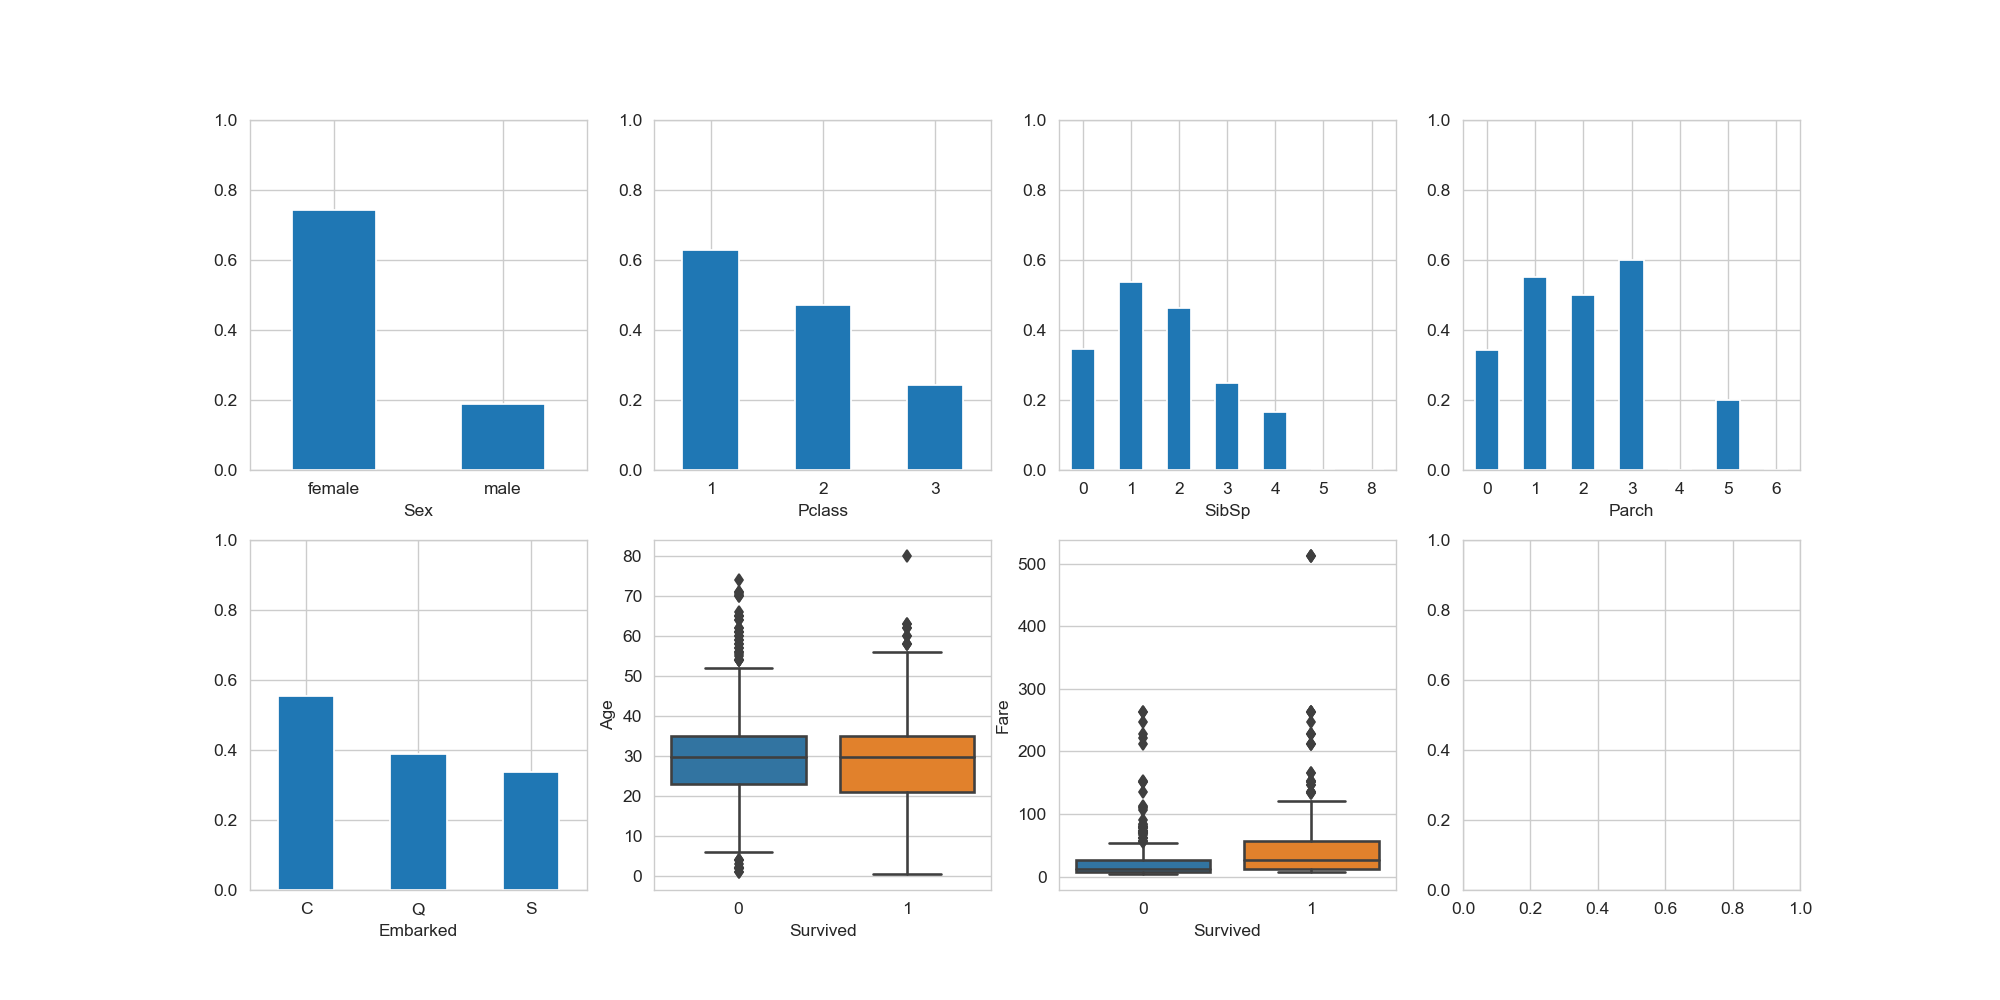

In [87]:
fig, axes = plt.subplots(2,4, figsize=(16,8))

From the above biavriate analysis multiple important inferences can be made
- Survival rate of female is much higher than that of male.
- The order of survival rates w.r.t to pclass in decreasing oreder is 1->2->3 (Here pclass 1 is the highest valued followed by 2 and then 3).

In [88]:
df.groupby('Sex')['Survived'].mean().plot(kind='bar', ax=axes[0,0], ylim=[0,1])
df.groupby('Pclass')['Survived'].mean().plot(kind='bar', ax=axes[0,1], ylim=[0,1])
df.groupby('SibSp')['Survived'].mean().plot(kind='bar', ax=axes[0,2], ylim=[0,1])
df.groupby('Parch')['Survived'].mean().plot(kind='bar', ax=axes[0,3], ylim=[0,1])
df.groupby('Embarked')['Survived'].mean().plot(kind='bar', ax=axes[1,0], ylim=[0,1])
sns.boxplot(x='Survived', y='Age', data=df, ax=axes[1,1])
sns.boxplot(x='Survived', y='Fare', data=df, ax=axes[1,2])

axes[0,0].set_xticklabels(labels=axes[0,0].get_xticklabels(), rotation=0)
axes[0,1].set_xticklabels(labels=axes[0,1].get_xticklabels(), rotation=0)
axes[0,2].set_xticklabels(labels=axes[0,2].get_xticklabels(), rotation=0)
axes[0,3].set_xticklabels(labels=axes[0,3].get_xticklabels(), rotation=0)
axes[1,0].set_xticklabels(labels=axes[1,0].get_xticklabels(), rotation=0)

[Text(0.0, 0, 'C'), Text(0.2, 0, 'Q'), Text(0.4, 0, 'S')]

### Correlation heatmap

<IPython.core.display.Javascript object>


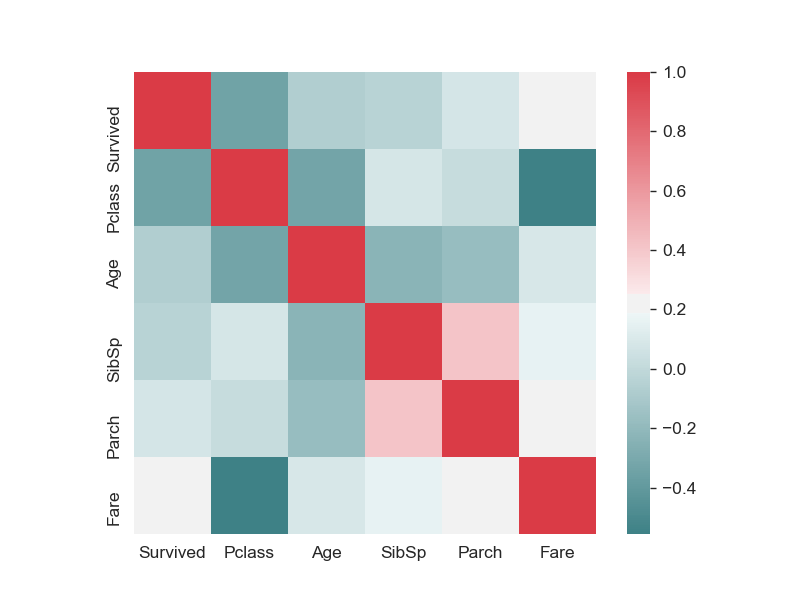

In [89]:
fig, axes = plt.subplots(1,1)

In [90]:
sns.heatmap(df.corr(), mask=np.zeros_like(df.corr()), square=True, cmap=sns.diverging_palette(200, 10, as_cmap=True), ax=axes)

In [91]:
df.corr()

,Survived,Pclass,Age,SibSp,Parch,Fare
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.251092
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.556409
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.094039
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.155030
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.211818
Fare,0.251092,-0.556409,0.094039,0.155030,0.211818,1.000000


### Prediction using Logistic Regression

In [92]:
sex = pd.get_dummies(df['Sex'], drop_first=True)

In [93]:
embark = pd.get_dummies(df['Embarked'], drop_first=True)

In [94]:
columns_dropped_df = df.drop(['Name', 'Sex', 'Embarked', 'Ticket', 'Cabin'], axis=1)

- We have dropped the columns which are no longer needed.
- Also since Cabin column has many nan values we drop it.

In [96]:
columns_dropped_df.info()

#No nan values

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Age       891 non-null    float64
 3   SibSp     891 non-null    int64  
 4   Parch     891 non-null    int64  
 5   Fare      891 non-null    float64
dtypes: float64(2), int64(4)
memory usage: 88.7 KB


In [97]:
final_df = pd.concat([columns_dropped_df, sex, embark], axis=1)

In [98]:
from sklearn.model_selection import train_test_split

In [99]:
X_train, X_test, y_train, y_test = train_test_split(final_df.drop('Survived', axis=1) ,final_df['Survived'], test_size=0.30,
                                                    random_state=101)

In [100]:
from sklearn.linear_model import LogisticRegression

In [101]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

C:\Users\Jugal\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
predictions = lr.predict(X_test)

In [103]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [104]:
acc = confusion_matrix(y_test, predictions)

In [105]:
acc

array([[135,  19],
       [ 40,  74]], dtype=int64)

In [106]:
acc_score = accuracy_score(y_test, predictions)
acc_score

0.7798507462686567

### Prediction using RandomForestClassifier

In [108]:
trainML = df[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Embarked']]


trainML = trainML.dropna()

trainML.isnull().sum()

Survived    0
Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [110]:
from sklearn.ensemble import RandomForestClassifier

X=trainML[['Age', 'SibSp', 'Parch',
       'Fare']].values # Taking all the numerical values

y = trainML['Survived'].values


RF = RandomForestClassifier()
RF.fit(X, y)

# Make a prediction
y_predict = RF.predict(X)

#Calculate accuracy
(y == y_predict).mean()

0.9572553430821147